In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, LabelEncoder

post_vacc_inf = pd.read_csv("../data/Post-Vaccination_Infection_Data.csv")

vacc_prog = pd.read_csv("../data/Vaccine_Progress_Dashboard_Data.csv")

## Post-Vaccination_Infection_Data study

In [7]:
# This table shows stats of california state infection data respect to vaccination
post_vacc_inf

,date,area,area_type,unvaccinated_cases,vaccinated_cases,boosted_cases,unvaccinated_hosp,vaccinated_hosp,boosted_hosp,unvaccinated_deaths,...,population_boosted,unvaccinated_cases_per_100k,vaccinated_cases_per_100k,boosted_cases_per_100k,unvaccinated_hosp_per_100k,vaccinated_hosp_per_100k,boosted_hosp_per_100k,unvaccinated_deaths_per_100k,vaccinated_deaths_per_100k,boosted_deaths_per_100k
0,2021-02-01,California,State,13982,22,0,768,0,0,12,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-02,California,State,11476,17,0,595,0,0,15,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-03,California,State,10453,26,0,553,0,0,17,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-04,California,State,9125,17,0,489,0,0,19,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-05,California,State,8514,16,0,494,0,0,28,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,2022-02-09,California,State,5801,3962,3143,193,95,45,72,...,12831853,136.442168,33.237546,26.064602,5.262232,0.930214,0.542178,1.979602,0.282743,0.119123
374,2022-02-10,California,State,4984,3510,2716,158,84,52,67,...,12911791,125.995601,30.418018,24.294516,4.877432,0.847087,0.498990,1.915123,0.255605,0.108428
375,2022-02-11,California,State,4577,3141,2511,140,75,45,61,...,13014350,116.791658,27.973335,22.558615,4.375343,0.774970,0.467616,1.759615,0.223242,0.106476
376,2022-02-12,California,State,2457,1764,1523,121,59,47,49,...,13066469,112.475664,26.555938,21.456228,4.019590,0.720985,0.453724,1.621773,0.210110,0.099491


In [8]:
# It is a daily data from 2021-02-01 to 2022-02-13
# March 2022 data also available online
post_vacc_inf['date'].value_counts()

2021-02-01    1
2021-10-07    1
2021-10-16    1
2021-10-15    1
2021-10-14    1
             ..
2021-06-05    1
2021-06-04    1
2021-06-03    1
2021-06-02    1
2022-02-13    1
Name: date, Length: 378, dtype: int64

In [11]:
# Check for missing data
for column in post_vacc_inf.columns:
    count = post_vacc_inf[column].isnull().sum()
    if count > 0:
      print(f'{column} has {count} missing data')
    
# the reason of missing data are the first 6 days without vaccine and first 193 days bootster not released
## We should fill data with 0 in preprocessing

unvaccinated_cases_per_100k has 6 missing data
vaccinated_cases_per_100k has 6 missing data
boosted_cases_per_100k has 193 missing data
unvaccinated_hosp_per_100k has 6 missing data
vaccinated_hosp_per_100k has 6 missing data
boosted_hosp_per_100k has 193 missing data
unvaccinated_deaths_per_100k has 6 missing data
vaccinated_deaths_per_100k has 6 missing data
boosted_deaths_per_100k has 193 missing data


In [2]:
# Data type on the table looks already cleaned
post_vacc_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          378 non-null    object 
 1   area                          378 non-null    object 
 2   area_type                     378 non-null    object 
 3   unvaccinated_cases            378 non-null    int64  
 4   vaccinated_cases              378 non-null    int64  
 5   boosted_cases                 378 non-null    int64  
 6   unvaccinated_hosp             378 non-null    int64  
 7   vaccinated_hosp               378 non-null    int64  
 8   boosted_hosp                  378 non-null    int64  
 9   unvaccinated_deaths           378 non-null    int64  
 10  vaccinated_deaths             378 non-null    int64  
 11  boosted_deaths                378 non-null    int64  
 12  population_unvaccinated       378 non-null    int64  
 13  popul

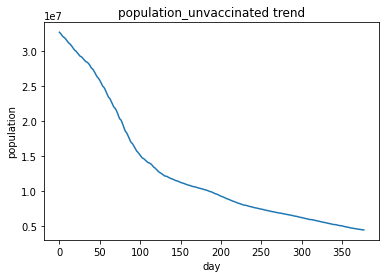

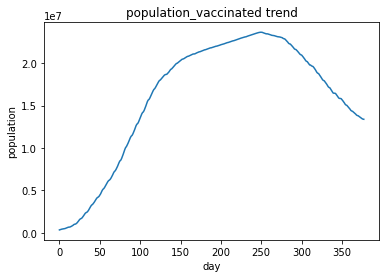

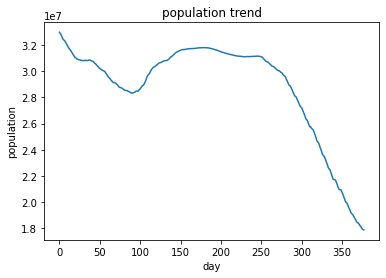

249    2021-10-08
Name: date, dtype: object

In [24]:
plt.plot(post_vacc_inf['population_unvaccinated'])
plt.title('population_unvaccinated trend')
plt.xlabel('day')
plt.ylabel('population')
plt.show()

plt.plot(post_vacc_inf['population_vaccinated'])
plt.title('population_vaccinated trend')
plt.xlabel('day')
plt.ylabel('population')
plt.show()

plt.plot(post_vacc_inf['population_unvaccinated'] + post_vacc_inf['population_vaccinated'])
plt.title('population trend')
plt.xlabel('day')
plt.ylabel('population')
plt.show()


post_vacc_inf.loc[(post_vacc_inf['population_vaccinated'].max() == post_vacc_inf['population_vaccinated'])]['date']

# For some reason the vaccinated population dropped since 2021-10-08, it could be people moving out of state/death/etc.